In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import pickle
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import twitter
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

import tkinter as tk
import pandas as pd
from pandastable import Table, TableModel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tkinter import *
import tkinter as tk
import ipywidgets as widgets
from IPython.display import display, clear_output
from tkinter import *
from PIL import ImageTk, Image
import json
import warnings
from tkinter import ttk
from tkcalendar import Calendar,DateEntry
from tkinter.messagebox import showinfo
import os 
import PIL 
import glob
from datetime import datetime
import speech_recognition as sr

In [3]:
consumer_key="DR3UsIQHEJJdd4dSuY6ksPvnn"
consumer_secret="VP7CKOz8csUACKcFnEzjKp9ZrZeUuHt9U100bRQiad1QXgYSAI"
access_token="1319530376956706818-wauMwDmVaGDBAvbodTuO3haJO4YuAM"
access_token_secret="kyrSD9VXGxh6es9dN2RQu8SyH7HCDdq7f3hVZerVYyZrh"
bearer_token ="AAAAAAAAAAAAAAAAAAAAAP%2BYaAEAAAAAohNmsYv8LaQ0CsG0yYxt7so%2BYkg%3DtOgdpwX8QXNVrXp5ZH2VuyWV3thAByXjbx6kuIo2yVpUlYi3oN"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
import requests
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

### Calling the Interface.

In [6]:
%run  ./SmallInterface.ipynb

### Show data introduced by the interface.

In [7]:
print("Username:"+ username.get())
print("Character selected:"+ n.get())
print("Initial date selected:"+ calinidate.get())
print("Final date selected:"+ calenddate.get())
print(f"1 means 100 tweets by default, 2 means a defined less than 100 tweets:{var.get()}")
if(var.get()==1):
    print(f"Number of tweets: {100}")
else:
    print(f"Number of tweets: {var1.get()}")
print("If it is by audio show here:" + texto.get())

Username:
Character selected:Politician
Initial date selected:4/1/22
Final date selected:4/22/22
1 means 100 tweets by default, 2 means a defined less than 100 tweets:1
Number of tweets: 100
If it is by audio show here:el presidente de Ecuador


### Methods to extract data from username , userId or tweetId

In [8]:
import re

texto1=texto.get()
texto1=texto1.lower()

if(username.get()!=""):
    info=client.get_user(username=username.get())
    maindata=info.text
    print(info.text)
else:
    print("Audio in text:"+texto1)
    dictwitter = dict([
      ('olivia', 'LuchoXBolivia'),
      ('eru', 'presidenciaperu'),
      ('olombia', 'IvanDuque'),
      ('gentina', 'alferdez'),
      ('ile', 'gabrielboric'),
      ('cuador', 'LassoGuillermo'),
      ('guay', 'LuisLacallePou'),
      ('araguay', 'MaritoAbdo'),
      ('sil', 'jairbolsonaro'),
      ('anama', 'NitoCortizo'),
      ('zuela', 'PresidencialVen'),
      ('mala', 'GuatemalaGob'),
      ('salvado', 'nayibbukele'),
      ('ica', 'presidenciacr'),
      ('ico', 'lopezobrador_'),
    ])
    i=0
    for p in dictwitter:
        cuenta=dictwitter.get(p)
               
        if(re.search(p,texto1)):
            #print('La palabra`{}`se ha encontrado en la frase'.format(p,cuenta))
            username1=cuenta
            i=i+1
        else:
            pass
    
    if (i==0):
        print('There is not concidences')
    else:
        info=client.get_user(username=username1)
        maindata=info.text
        print(info.text)

Audio in text:el presidente de ecuador
{"data":{"id":"300390462","name":"Guillermo Lasso","username":"LassoGuillermo"}}


### To obtain ID from the user.

In [9]:
first=maindata[15]
ID_build=first
position_ini=maindata.find(first)+1
positionstr=str(position_ini)
positionint=int(position_ini)

for caracter in enumerate(maindata):
    while(positionint>15 and positionint<1000):
        if(maindata[positionint]!='"'):
            ID_build=ID_build+maindata[positionint]
            positionint=positionint+1
        else:
            positionint=1000
                
ID_build=int(ID_build)
print(ID_build)

300390462


### To obtain the timeslots.

In [10]:
from datetime import datetime
input_strini = calinidate.get()+" 00:00:00"
input_str = calenddate.get()+" 23:59:00"

dt_objectini = datetime.strptime(
  input_strini, '%m/%d/%y %H:%M:%S')

dt_object = datetime.strptime(
  input_str, '%m/%d/%y %H:%M:%S')

start_time = dt_objectini.isoformat("T") + "Z"
end_time = dt_object.isoformat("T") + "Z"

print(dt_objectini.isoformat("T") + "Z")
print(dt_object.isoformat("T") + "Z")

2022-04-01T00:00:00Z
2022-04-22T23:59:00Z


In [11]:
id = ID_build

info3 = client.get_users_tweets(id=id, tweet_fields=['context_annotations','created_at','geo', 'possibly_sensitive'])
tweets_dict = info3.json()
#print(tweets_dict)

# # Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# # Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 
df

,possibly_sensitive,created_at,text,id,context_annotations
0,False,2022-04-22T01:15:44.000Z,RT @ComunicacionEc: ¡Continúa la lucha contra ...,1517311157069045760,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
1,False,2022-04-22T00:10:50.000Z,Les comparto que cada día crece la confianza i...,1517294822679273473,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
2,False,2022-04-21T21:11:16.000Z,Los equipos interinstitucionales y la fuerza p...,1517249635533926400,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
3,False,2022-04-21T19:15:33.000Z,La reactivación turística es un éxito. Estamos...,1517220510790299651,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
4,False,2022-04-21T17:39:46.000Z,Riobamba tiene un lugar especial en mi corazón...,1517196408033579009,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
5,False,2022-04-20T23:55:31.000Z,RT @erwinronquillo: Prestigioso medio de habla...,1516928581334671360,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
6,False,2022-04-20T20:25:34.000Z,Es motivo de alegría ver el interés que despie...,1516875745477513219,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
7,False,2022-04-20T20:25:34.000Z,Hoy les contaré un poco sobre nuestra visita a...,1516875743808077825,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
8,False,2022-04-20T19:05:14.000Z,RT @ComunicacionEc: COMUNICADO OFICIAL | Se ad...,1516855527883653120,"[{'domain': {'id': '10', 'name': 'Person', 'de..."
9,False,2022-04-20T01:33:47.000Z,Extiendo mis condolencias al alcalde de Quito ...,1516590924465418257,"[{'domain': {'id': '10', 'name': 'Person', 'de..."


In [12]:
if(username.get()!=""):
    
    
    if(var.get()==2):
        info2=client.get_users_tweets(id=ID_build, max_results=var1.get(), tweet_fields=['created_at'])
    else:
        info2=client.get_users_tweets(id=ID_build, max_results=100, tweet_fields=['created_at'])
else:
    info2=client.get_users_tweets(id=ID_build, max_results=100, tweet_fields=['created_at'])
        
tweets_dict = info2.json()
# print(tweets_dict)
# Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 
df

,created_at,id,text
0,2022-04-22T01:15:44.000Z,1517311157069045760,RT @ComunicacionEc: ¡Continúa la lucha contra ...
1,2022-04-22T00:10:50.000Z,1517294822679273473,Les comparto que cada día crece la confianza i...
2,2022-04-21T21:11:16.000Z,1517249635533926400,Los equipos interinstitucionales y la fuerza p...
3,2022-04-21T19:15:33.000Z,1517220510790299651,La reactivación turística es un éxito. Estamos...
4,2022-04-21T17:39:46.000Z,1517196408033579009,Riobamba tiene un lugar especial en mi corazón...
...,...,...,...
95,2022-04-05T03:17:45.000Z,1511181270558064645,RT @ComunicacionEc: Actualización frente a los...
96,2022-04-04T23:16:16.000Z,1511120496766689283,Con esta decisión se evitará cualquier tipo de...
97,2022-04-04T23:13:51.000Z,1511119891247607812,La seguridad es prioridad #1 de nuestro gobier...
98,2022-04-04T03:02:36.000Z,1510815066861539339,Felicito a @RodrigoChavesR por su elección com...


In [13]:
if(username.get()!=""):
    mask = (df['created_at'] > start_time) & (df['created_at'] <= end_time)
    df=df.loc[mask]
else:
    pass
df


,created_at,id,text
0,2022-04-22T01:15:44.000Z,1517311157069045760,RT @ComunicacionEc: ¡Continúa la lucha contra ...
1,2022-04-22T00:10:50.000Z,1517294822679273473,Les comparto que cada día crece la confianza i...
2,2022-04-21T21:11:16.000Z,1517249635533926400,Los equipos interinstitucionales y la fuerza p...
3,2022-04-21T19:15:33.000Z,1517220510790299651,La reactivación turística es un éxito. Estamos...
4,2022-04-21T17:39:46.000Z,1517196408033579009,Riobamba tiene un lugar especial en mi corazón...
...,...,...,...
95,2022-04-05T03:17:45.000Z,1511181270558064645,RT @ComunicacionEc: Actualización frente a los...
96,2022-04-04T23:16:16.000Z,1511120496766689283,Con esta decisión se evitará cualquier tipo de...
97,2022-04-04T23:13:51.000Z,1511119891247607812,La seguridad es prioridad #1 de nuestro gobier...
98,2022-04-04T03:02:36.000Z,1510815066861539339,Felicito a @RodrigoChavesR por su elección com...


In [14]:
len(df)

100

In [15]:
#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [17]:
df["text"] = df["text"].apply(wordopt)

In [18]:
#Save df in a new dataframe to make some visual analysis after.
dftweets=df

In [19]:
#### Interface to select the tweet and predict.

In [20]:
from tkinter import *
from  tkinter import ttk


ws  = Tk()
ws.title('Dataframe Fake News')
ws.geometry('1000x500')
ws['bg'] = '#AC99F2'

game_frame = Frame(ws, width=800, height=800)
game_frame.grid(row=0,column=0,padx=20,pady=20, ipadx=500,ipady=500)
game_frame.pack()

#scrollbar
game_scroll = Scrollbar(game_frame, orient='vertical')
game_scroll.pack(side=RIGHT, fill=Y)

game_scroll = Scrollbar(game_frame,orient='horizontal')
game_scroll.pack(side= BOTTOM,fill=X)

my_game = ttk.Treeview(game_frame, yscrollcommand=game_scroll.set, xscrollcommand =game_scroll.set)


my_game.pack()

game_scroll.config(command=my_game.yview)
game_scroll.config(command=my_game.xview)

#define our column
my_game['columns'] = ('created_at', 'id', 'text')

# format our column
my_game.column("#0", width=0,  stretch=NO)
my_game.column("created_at",anchor=CENTER, width=150)
my_game.column("id",anchor=CENTER,width=150)
my_game.column("text",anchor=CENTER,width=600)


#Create Headings 
my_game.heading("#0",text="",anchor=CENTER)
my_game.heading("created_at",text="created_at",anchor=CENTER)
my_game.heading("id",text="id",anchor=CENTER)
my_game.heading("text",text="text",anchor=CENTER)

#add data 
for i in df.index: 
    #print("THE TEXT "+ df["text"][i])
    my_game.insert(parent='',index='end',iid=i,text='',values=(df["created_at"][i],df["id"][i],df["text"][i]))

my_game.pack()

frame = Frame(ws)
frame.pack(pady=20)

#labels
created_at= Label(frame,text = "created_at")
created_at.grid(row=0,column=0 )

id = Label(frame,text="id")
id.grid(row=0,column=1)

text = Label(frame,text="text")
text.grid(row=0,column=2)

#Entry boxes
created_at_entry_var = StringVar()
created_at_entry= Entry(frame, textvariable=created_at_entry_var, width=30)
created_at_entry.grid(row= 1, column=0)

id_entry_var = IntVar()
id_entry = Entry(frame,textvariable=id_entry_var, width=30)
id_entry.grid(row=1,column=1)

text_entry_var = StringVar()
text_entry = Entry(frame, textvariable=text_entry_var, width=100)
text_entry.grid(row=1,column=2)

#Select Record
def select_record():
    #clear entry boxes
    created_at_entry.delete(0,END)
    id_entry.delete(0,END)
    text_entry.delete(0,END)
    
    #grab record
    selected=my_game.focus()
    #grab record values
    values = my_game.item(selected,'values')
    #temp_label.config(text=selected)

    #output to entry boxes
    created_at_entry.insert(0,values[0])
    id_entry.insert(0,values[1])
    text_entry.insert(0,values[2])
    
    Recovery_created_at=values[0]
    Recovery_id=values[1]
    Recovery_text=values[2]
    

#save Record
def update_record():
    selected=my_game.focus()
    #save new data 
    my_game.item(selected,text="",values=(created_at_entry.get(),id_entry.get(),text_entry.get()))
    
   #clear entry boxes
    created_at_entry.delete(0,END)
    id_entry.delete(0,END)
    text_entry.delete(0,END)
    
#Send and close
def send_record():
    ws.destroy()
    %run  ./Small_Prediction.ipynb
    
    

#Buttons
select_button = Button(ws,text="Select Record", command=select_record)
select_button.pack(pady =10)

refresh_button = Button(ws,text="Refresh Record",command=update_record)
refresh_button.pack(pady = 10)

Close_button = Button(ws,text="Send to predict and close",command=send_record)
Close_button.pack(pady = 10)


ws.mainloop()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       471
           1       0.92      0.92      0.92       461

    accuracy                           0.92       932
   macro avg       0.92      0.92      0.92       932
weighted avg       0.92      0.92      0.92       932

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       471
           1       0.90      0.91      0.90       461

    accuracy                           0.90       932
   macro avg       0.90      0.90      0.90       932
weighted avg       0.90      0.90      0.90       932

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       471
           1       0.92      0.97      0.95       461

    accuracy                           0.94       932
   macro avg       0.95      0.94      0.94       932
weighted avg       0.95      0.94      0.94       932

              preci

In [21]:
print(created_at_entry_var.get())
print(id_entry_var.get())
print(text_entry_var.get())


2022-04-20T20:25:34.000Z
1516875743808077825
hoy les contaré un poco sobre nuestra visita a argentina y uruguay     expresé la importancia de fortalecer la integración de la región   tuvimos el segundo ecuador open for business en el exterior y reuniones de trabajo con empresas    estrechamos la cooperación comercial


### Analysis tweets.

In [22]:

dftext=dftweets.iloc[0:len(df)]['text']
dftext


0     rt  comunicacionec   continúa la lucha contra ...
1     les comparto que cada día crece la confianza i...
2     los equipos interinstitucionales y la fuerza p...
3     la reactivación turística es un éxito  estamos...
4     riobamba tiene un lugar especial en mi corazón...
                            ...                        
95    rt  comunicacionec  actualización frente a los...
96    con esta decisión se evitará cualquier tipo de...
97    la seguridad es prioridad   de nuestro gobiern...
98    felicito a  rodrigochavesr por su elección com...
99    rt  comunicacionec  los ministros  carrilloros...
Name: text, Length: 100, dtype: object

In [23]:
for i in dftext.index: 
    print("THE TEXT "+ dftweets["text"][i])
    

THE TEXT rt  comunicacionec   continúa la lucha contra la delincuencia organizada   en guayaquil y durán  se desarrolló el operativo  gran impacto  
THE TEXT les comparto que cada día crece la confianza internacional para la inversión minera  escalamos  puntos en la encuesta anual del  fraserinstitute y alcanzamos el puesto  de  jurisdicciones mineras del mundo  vamos en el camino correcto  https   t co 
THE TEXT los equipos interinstitucionales y la fuerza pública se encuentran en territorio acompañando a los afectados por el desbordamiento del río burgay  mi solidaridad con las familias y las comunidades de la zona  estamos con ustedes  brindando todo el apoyo para que salgan adelante 
THE TEXT la reactivación turística es un éxito  estamos rompiendo récord  carnaval y semana santa dejan   millones en gasto turístico  vamos  https   t co mfieycduyo
THE TEXT riobamba tiene un lugar especial en mi corazón  su historia  su gente  sus paisajes  le envío un abrazo a todos los riobambeños 

In [24]:
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [25]:
#This splits all the sentences up which makes it easier for us to work with.
all_sentences = []

for word in dftext:
    all_sentences.append(word)
all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
print(lines)

['rt', 'comunicacionec', 'continúa', 'la', 'lucha', 'contra', 'la', 'delincuencia', 'organizada', 'en', 'guayaquil', 'y', 'durán', 'se', 'desarrolló', 'el', 'operativo', 'gran', 'impacto', 'les', 'comparto', 'que', 'cada', 'día', 'crece', 'la', 'confianza', 'internacional', 'para', 'la', 'inversión', 'minera', 'escalamos', 'puntos', 'en', 'la', 'encuesta', 'anual', 'del', 'fraserinstitute', 'y', 'alcanzamos', 'el', 'puesto', 'de', 'jurisdicciones', 'mineras', 'del', 'mundo', 'vamos', 'en', 'el', 'camino', 'correcto', 'https', 't', 'co', 'los', 'equipos', 'interinstitucionales', 'y', 'la', 'fuerza', 'pública', 'se', 'encuentran', 'en', 'territorio', 'acompañando', 'a', 'los', 'afectados', 'por', 'el', 'desbordamiento', 'del', 'río', 'burgay', 'mi', 'solidaridad', 'con', 'las', 'familias', 'y', 'las', 'comunidades', 'de', 'la', 'zona', 'estamos', 'con', 'ustedes', 'brindando', 'todo', 'el', 'apoyo', 'para', 'que', 'salgan', 'adelante', 'la', 'reactivación', 'turística', 'es', 'un', 'éxit

In [26]:
#Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
lines
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [27]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='spanish')
stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['rt',
 'comunicacionec',
 'contin',
 'la',
 'luch',
 'contr',
 'la',
 'delincuent',
 'organiz',
 'en',
 'guayaquil',
 'y',
 'durn',
 'se',
 'desarroll',
 'el',
 'oper',
 'gran',
 'impact',
 'les',
 'compart',
 'que',
 'cad',
 'da',
 'crec',
 'la',
 'confianz',
 'internacional',
 'par',
 'la',
 'inversin',
 'miner',
 'escal',
 'punt',
 'en',
 'la',
 'encuest',
 'anual',
 'del',
 'fraserinstitut',
 'y',
 'alcanz',
 'el',
 'puest',
 'de',
 'jurisdiccion',
 'miner',
 'del',
 'mund',
 'vam',
 'en',
 'el',
 'camin',
 'correct',
 'https',
 't',
 'co',
 'los',
 'equip',
 'interinstitucional',
 'y',
 'la',
 'fuerz',
 'pblic',
 'se',
 'encuentr',
 'en',
 'territori',
 'acomp',
 'a',
 'los',
 'afect',
 'por',
 'el',
 'desbord',
 'del',
 'ro',
 'burgay',
 'mi',
 'solidar',
 'con',
 'las',
 'famili',
 'y',
 'las',
 'comun',
 'de',
 'la',
 'zon',
 'estam',
 'con',
 'usted',
 'brind',
 'tod',
 'el',
 'apoy',
 'par',
 'que',
 'salg',
 'adel',
 'la',
 'reactivacin',
 'turstic',
 'es',
 'un',
 'xit',
 

In [28]:
# Geeting rid of the stopwords.
stem2 = []

for word in stem:
    if word not in stopwords.words('spanish'):
        stem2.append(word)

stem2

['rt',
 'comunicacionec',
 'contin',
 'luch',
 'contr',
 'delincuent',
 'organiz',
 'guayaquil',
 'durn',
 'desarroll',
 'oper',
 'gran',
 'impact',
 'compart',
 'cad',
 'da',
 'crec',
 'confianz',
 'internacional',
 'par',
 'inversin',
 'miner',
 'escal',
 'punt',
 'encuest',
 'anual',
 'fraserinstitut',
 'alcanz',
 'puest',
 'jurisdiccion',
 'miner',
 'mund',
 'vam',
 'camin',
 'correct',
 'https',
 't',
 'co',
 'equip',
 'interinstitucional',
 'fuerz',
 'pblic',
 'encuentr',
 'territori',
 'acomp',
 'afect',
 'desbord',
 'ro',
 'burgay',
 'solidar',
 'famili',
 'comun',
 'zon',
 'estam',
 'usted',
 'brind',
 'tod',
 'apoy',
 'par',
 'salg',
 'adel',
 'reactivacin',
 'turstic',
 'xit',
 'estam',
 'romp',
 'rcord',
 'carnaval',
 'seman',
 'sant',
 'dej',
 'millon',
 'gast',
 'turstic',
 'vam',
 'https',
 't',
 'co',
 'mfieycdu',
 'riobamb',
 'tien',
 'lug',
 'especial',
 'corazn',
 'histori',
 'gent',
 'paisaj',
 'envo',
 'abraz',
 'tod',
 'riobambe',
 'hoy',
 'celebr',
 'aos',
 'inde

In [29]:
#Counting the left words.
dftext2 = pd.DataFrame(stem2)
dftext2 = dftext2[0].value_counts()
dftext2

t                61
https            60
co               60
par              51
trabaj           32
                 ..
mafi              1
reactivndos       1
repotenciacin     1
detenid           1
manglaralt        1
Name: 0, Length: 824, dtype: int64

In [30]:
#This will give frequencies of our words

from nltk.probability import FreqDist
freqdoctor = FreqDist()

for words in dftext2:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 512, 2: 138, 3: 74, 5: 26, 4: 26, 7: 12, 6: 10, 10: 5, 11: 3, 9: 3, ...})

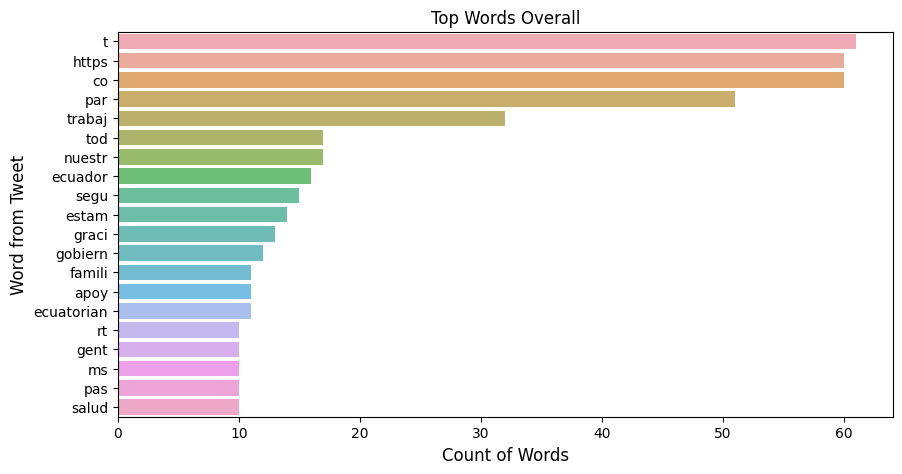

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#This is a simple plot that shows the top 20 words being used

dftext2 = dftext2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(dftext2.values, dftext2.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [32]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [33]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [34]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

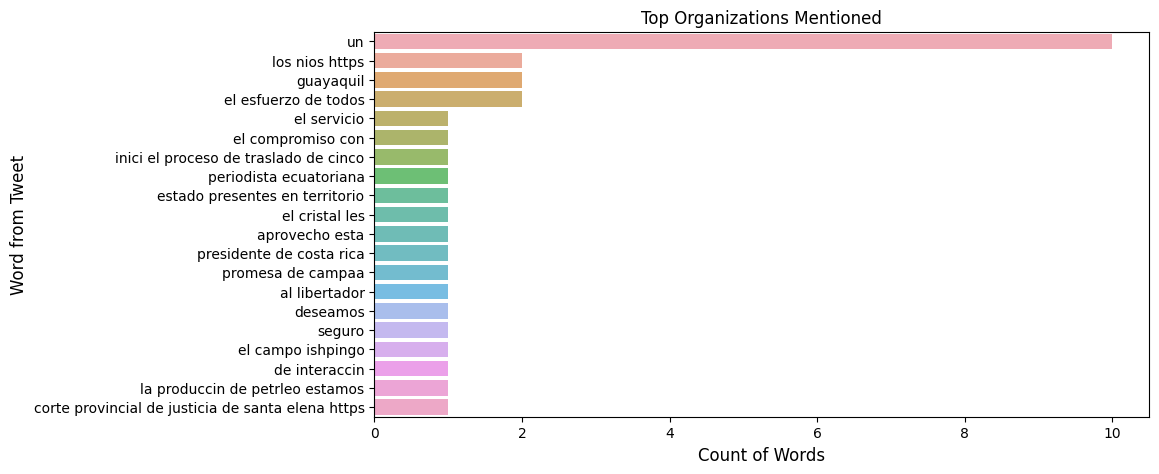

In [35]:
df1 = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [36]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

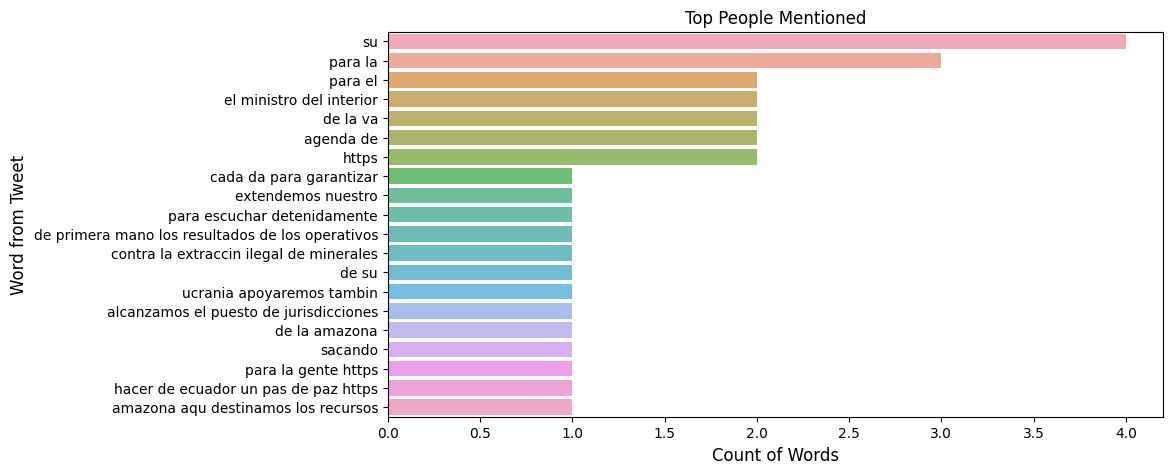

In [37]:
df1 = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

### Analysis of tweets and retweets

In [38]:
tweet_id = id_entry_var.get()
# By default, only the ID, name, and username fields of each user will be
# returned
# Additional fields can be retrieved using the user_fields parameter
response = client.get_retweeters(tweet_id, user_fields=["profile_image_url", "description", "entities", "location"])
# Save data as dictionary
tweets_dict = response.json()
# Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# # Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 
df

,description,profile_image_url,location,name,username,id,entities.url.urls,entities.description.hashtags,entities.description.mentions,entities.description.urls
0,Abogado ⚖️🇪🇨,https://pbs.twimg.com/profile_images/118180285...,Portoviejo-Manabí-Ecuador 🇪🇨,Jose Alberto Vera Hormaza,joseverahormaza,3518936782,NaN,NaN,NaN,NaN
1,Cuenta twitter oficial de la Embajada de Ecuad...,https://pbs.twimg.com/profile_images/139691193...,Tel Aviv - Israel,EmbajadaEC en Israel,EmbajadaEcuISR,1338995306,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN
2,"Padre esposo hijo. La confianza en la ciencia,...",https://pbs.twimg.com/profile_images/144768580...,NaN,Salomon Damocles,SalomonDamocles,1447683892115279872,NaN,NaN,NaN,NaN
3,Liberal/Libertarian\nUrban Music Fan\nSoccer Fan,https://pbs.twimg.com/profile_images/131008398...,NaN,William MN,WilliamMN1,379463651,NaN,NaN,NaN,NaN
4,Analista Distrital de Gestión de Riesgo,https://pbs.twimg.com/profile_images/105021804...,"Junin, Manabí, Ecuador",Guadriano90,GualbertoMorei1,979164947568562176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
91,#AmoraDistancia,https://pbs.twimg.com/profile_images/150209031...,NaN,Samantha Ortiz,Samanthatusol,1502090197441335339,NaN,"[{'start': 0, 'end': 15, 'tag': 'AmoraDistanci...",NaN,NaN
92,#LDU\n#Futbol\n#ConocerAmigas,https://pbs.twimg.com/profile_images/150494539...,NaN,Raúl Urua,RaulUrua,1504945266344005634,NaN,"[{'start': 0, 'end': 4, 'tag': 'LDU'}, {'start...",NaN,NaN
93,Todo lo puedo en Cristo que me frotalece,https://pbs.twimg.com/profile_images/151536364...,NaN,Angie Sánchez,AngieSn19,1515363486058041351,NaN,NaN,NaN,NaN
94,LDU CAMPEON\nMe gustaría conocer amigas,https://pbs.twimg.com/profile_images/150597136...,NaN,Paúl León,Paulleonni,1505971274262134787,NaN,NaN,NaN,NaN


In [39]:
user_id = ID_build

# By default, only the ID and text fields of each Tweet will be returned
# Additional fields can be retrieved using the tweet_fields parameter
response = client.get_liked_tweets(user_id, tweet_fields=["created_at", 'author_id','geo'])
tweets_dict = response.json()
# Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# # Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 
df

,created_at,id,author_id,text,geo.place_id
0,2022-04-05T16:47:07.000Z,1511384951840776197,1050192735418896387,@LassoGuillermo Excelente Presidente,NaN
1,2022-04-05T14:36:55.000Z,1511352186625789975,4138447222,@LassoGuillermo 💪💪🇪🇨🇪🇨 muy buena gestión,NaN
2,2022-03-31T01:08:50.000Z,1509336887416217604,130379059,@LassoGuillermo @panchojimenezs @CarrilloRoser...,NaN
3,2022-03-31T04:01:40.000Z,1509380382503936002,169663977,@LassoGuillermo @CarrilloRosero @panchojimenez...,NaN
4,2022-03-31T17:58:20.000Z,1509590933918130192,1415127459675217988,@LassoGuillermo Excelente señor presidente con...,NaN
...,...,...,...,...,...
69,2021-04-14T03:57:18.000Z,1382181142468689920,34140316,Gracias @LassoGuillermo por la confianza y el ...,NaN
70,2021-04-11T11:31:22.000Z,1381208249152716800,3911654182,Deseo lo mejor para este lindo país que me aco...,NaN
71,2021-04-12T01:33:37.000Z,1381420205973331968,3911654182,Este es un tipo que respeto mucho mucho y que ...,NaN
72,2021-04-12T01:15:05.000Z,1381415542653919241,3911654182,Honor increíble haber podido trabajar las últi...,NaN


### Network analysis of a certain user

In [41]:
id = ID_build

info3 = client.get_users_tweets(id=id, tweet_fields=['created_at', 'public_metrics'], user_fields=['location', 'id'],max_results=100)
tweets_dict = info3.json()
#print(tweets_dict)

# # Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# # Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 
df.columns

Index(['text', 'id', 'created_at', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count'],
      dtype='object')

Number of tweets: 100
Total number of likes: 16452
Total number of retweets: 5884


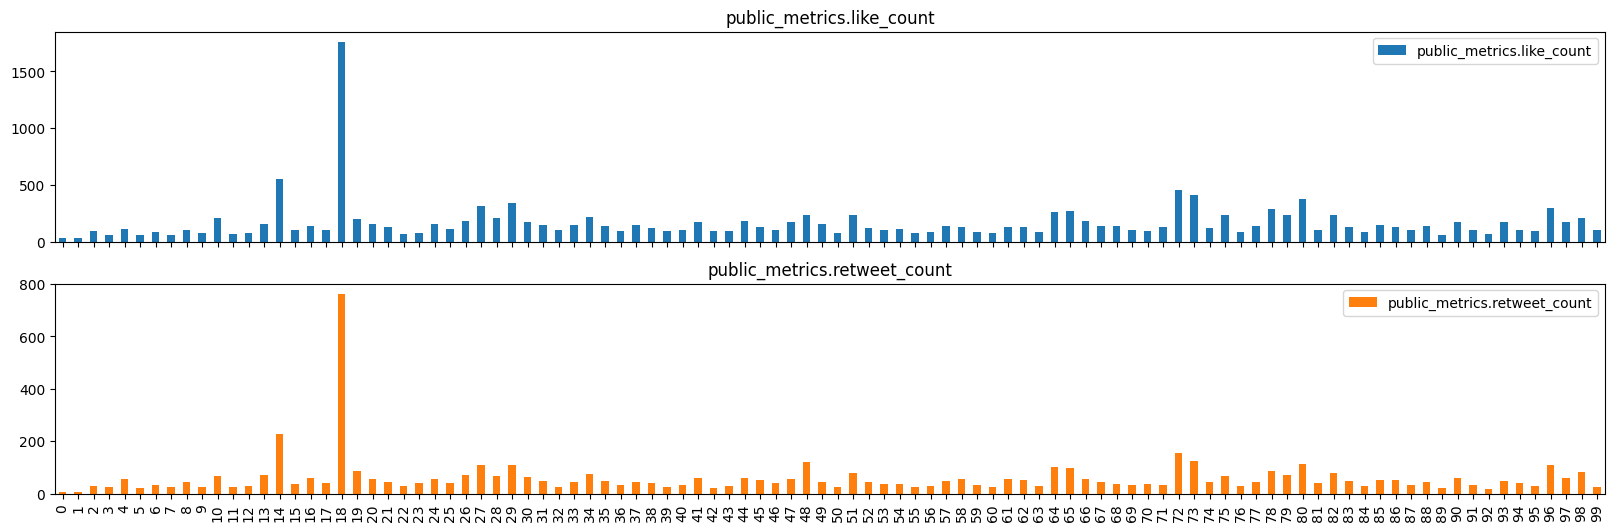

In [42]:
# Likes and retweets
tweet_count = len(df)
favorite_count = df['public_metrics.like_count'].sum()
retweet_count = df['public_metrics.retweet_count'].sum()# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(20,6),y=
   ['public_metrics.like_count','public_metrics.retweet_count'])
plt.show()

In [ ]:
lijst=client.get_users_followers(ID_build,max_results=100)
tweets_dict = lijst.json()
#print(tweets_dict)
# # Extract "data" value from dictionary
tweets_data = tweets_dict["data"] 
# print(tweets_data)
# # Transform to pandas Dataframe
df1 = pd.json_normalize(tweets_data) 
df1.columns
len(tweets_data)

Rate limit exceeded. Sleeping for 72 seconds.


In [47]:
df1

,id,name,username
0,705525582617038849,Ninaoloramandarina,NinhodeGuzmanR
1,1503772300344238090,Necrossiz,N_Cros_iZz
2,1517397809703575555,Fredy,Fredy48535885
3,1513678620463616002,Elmer Vélez Rodríguez,ElmerVlez
4,1200543712587210759,ferchulandia,ferroviraruiz
...,...,...,...
95,1421224431003869189,Glay Guerra Hechavarría,GlayGuerra
96,1509516860726910982,Celia Lazo,celialazo8
97,1326953161521848320,Esperanza🌙☀️,hipolita_rs
98,1516213920024993795,Percy Guaricoma Soliz,GuaricomaPercy


In [48]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = df1.username #Set the list of followers as the target column
df['source'] = ID_build #Set my user ID as the source 
df

,source,target
0,1222273871488917504,NinhodeGuzmanR
1,1222273871488917504,N_Cros_iZz
2,1222273871488917504,Fredy48535885
3,1222273871488917504,ElmerVlez
4,1222273871488917504,ferroviraruiz
...,...,...
95,1222273871488917504,GlayGuerra
96,1222273871488917504,celialazo8
97,1222273871488917504,hipolita_rs
98,1222273871488917504,GuaricomaPercy


In [49]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

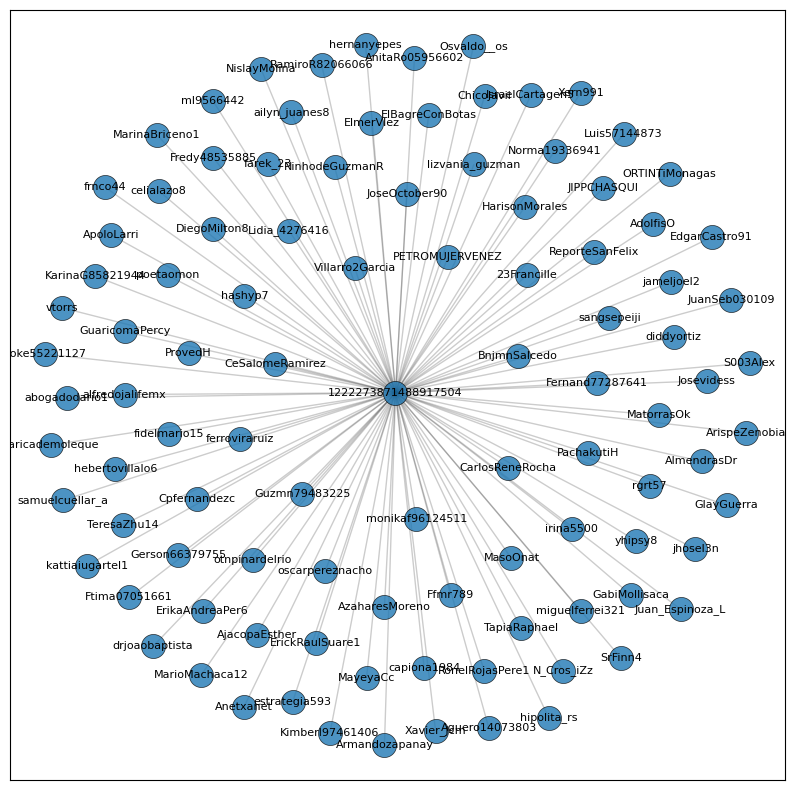

In [50]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [51]:
print(list(df['target']))

['NinhodeGuzmanR', 'N_Cros_iZz', 'Fredy48535885', 'ElmerVlez', 'ferroviraruiz', 'TeresaZhu14', 'hernanyepes', 'frnco44', 'lizvania_guzman', 'farek_23', 'ApoloLarri', 'Xern991', 'rgrt57', 'sangsepeiji', 'estrategia593', 'laricademoleque', 'ChicoJavii', 'AnitaRo05956602', 'PachakutiH', 'AdolfisO', 'MayeyaCc', 'ElBagreConBotas', 'otnpinardelrio', 'Luis57144873', 'NislayMolina', 'ErikaAndreaPer6', 'Ftima07051661', 'capiona1984', 'SrFinn4', 'kattiaiugartel1', 'Juan_Espinoza_L', 'yhipsy8', 'GabiMollisaca', 'Guzmn79483225', 'samuelcuellar_a', 'Armandozapanay', 'Josevidess', 'HarisonMorales', 'alfredojalifemx', 'MarinaBriceno1', 'CarlosReneRocha', 'AzaharesMoreno', 'jameljoel2', 'KarinaG85821944', 'hashyp7', 'PETROMUJERVENEZ', 'ailyn_juanes8', 'Koke55221127', 'AlmendrasDr', 'Gerson66379755', 'MatorrasOk', 'TapiaRaphael', 'JuanSeb030109', 'Norma19336941', 'S003Alex', 'JIPPCHASQUI', 'RonelRojasPere1', 'ReporteSanFelix', 'Fernand77287641', '23Francille', 'monikaf96124511', 'Aguero14073803', 'Anet

In [ ]:
user_list = list(df['target']) 
for username in user_list:
    followers = []
    follower_list = []
    userID=df1.id[0]
    user=client.get_user(id=userID)
   
    for item in client.get_users_followers(userID,max_results=10):
        followers.extend(item)
        follower_list.append(followers)
    
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = username
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")
#df    

Rate limit exceeded. Sleeping for 879 seconds.
Rate limit exceeded. Sleeping for 895 seconds.


In [ ]:
df = pd.read_csv("networkOfFollowers.csv") #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
G.number_of_nodes()

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head(100)

In [ ]:
import community
from community import community_louvain
partition = community_louvain.best_partition(G)#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted
dc

In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")
combined

In [ ]:
pos = nx.spring_layout(G)
f, ax = plt.subplots(figsize=(20, 20))
plt.style.use('ggplot')#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

### Extract data from tweet.csv

In [ ]:
data = pd.read_csv("tweets.csv")
data = data.iloc[: , 1:]
data.head()

### Analysis of users retweeting on fake news

In [ ]:
retweet=client.get_retweeters(1512188318552932354,tweet_fields=['created_at', 'public_metrics'], user_fields=['username', 'id'],max_results=20)

tweets_dict = retweet.json()

tweets_data = tweets_dict['data']

df2 = pd.json_normalize(tweets_data) 
#df2

In [ ]:
import json
tweet_list = list(data['id']) 
retweeters = []
df3=[]
for i in range(len(tweet_list)):
    retweet=client.get_retweeters(tweet_list[i],tweet_fields=['created_at', 'public_metrics'], user_fields=['username', 'id'],max_results=100)
    #print(retweet)
    retweeters.append(retweet.json())
tweets_data=[]
for i in range(len(retweeters)):
    tweets = retweeters[i]['data']
    df2 = pd.json_normalize(tweets) 
    tweets_data.append(df2)

df3=pd.DataFrame()
df3=df3.append(tweets_data, ignore_index=True)
df3

,id,name,username
0,981653184786698241,Koko,Koko33382881
1,1349687360,SEBASTIAN MICHEL,Sebas_Michel
2,1395742553660706820,EmbaBoliviaVzla,embaboliviavzla
3,739812646980059136,Ministerio de Minería y Metalurgia,minmineriabo
4,933766835778048001,Carlos Osinaga Romero,CarlosOsinagaR1
...,...,...,...
1511,1196223811231850497,ramiro altamirano,ramiroa57922705
1512,863204889727553536,Paola,PaoliAndi
1513,2887104567,Lalo RE,e1969ramirez
1514,2908494171,Ariel Silva Valencia,Arielespueblo


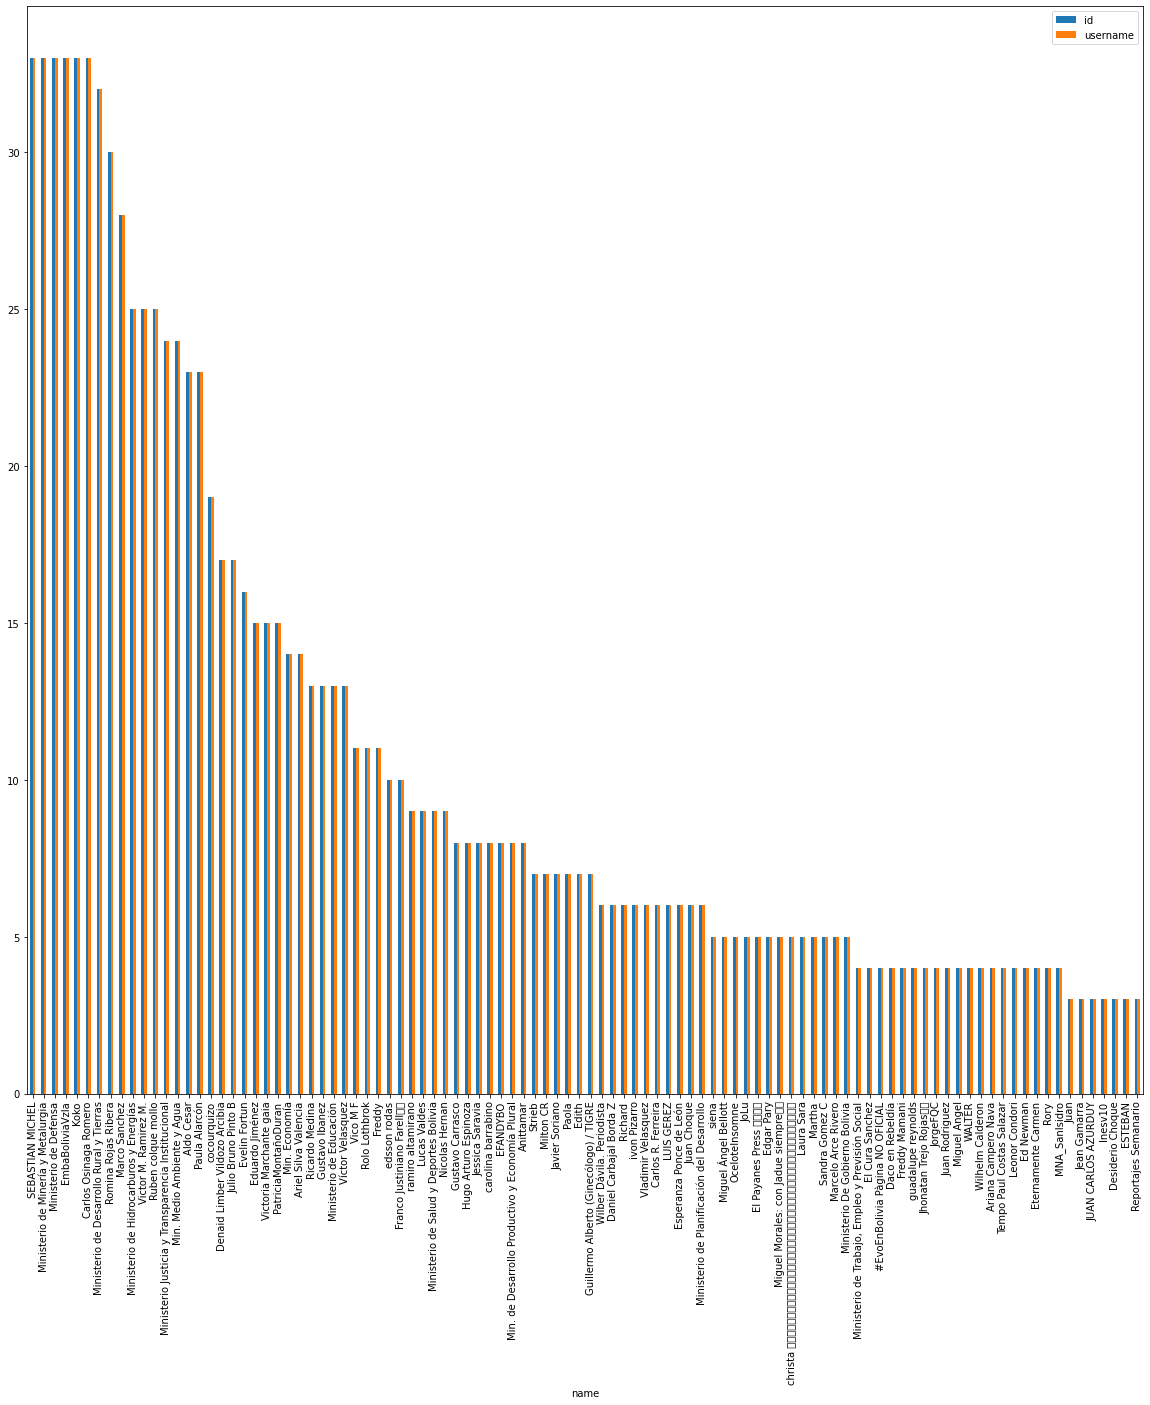

In [ ]:
df4=df3.groupby(['name']).count().sort_values(['id'], ascending=False).head(100)

df4.plot(kind="bar",figsize=(20, 20))

plt.show()